In [1]:
#@title imports
# !pip install ta
# !pip install pykalman
!pip install pandas-datareader
!pip install pandas
# !pip install matplotlib
# !pip install fast-ta
!pip install yfinance
!pip install mplfinance
# 
# !wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
# !tar -xzvf ta-lib-0.4.0-src.tar.gz
# %cd ta-lib
# !./configure --prefix=/usr
# !make
# !make install
# !pip install Ta-Lib
# import talib

# !pip install ta
# import ta 

import numpy as np
import pandas as pd
import time
import matplotlib.ticker as ticker

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns
import random
sns.set()

# More Plotting libaries 
from mplfinance.original_flavor import candlestick_ohlc
from matplotlib.pylab import date2num
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

# libraries for Data Download
import datetime
from pandas_datareader import data as pdr
import yfinance as yf

# regression
from sklearn.linear_model import LinearRegression
# from datetime import datetime
import sklearn.preprocessing 
# !pip install optuna
# import optuna
# import joblib
from sklearn import linear_model
from sklearn import model_selection

In [2]:
#@title logfit

def logfit(tickax,inception):
  data = pdr.get_data_yahoo(tickax, interval = '1d', period = "9y")
  y =  np.array(data['Adj Close'])

  x = pd.date_range(start=inception,end=data.reset_index()['Date'][len(data)-1].strftime('%Y-%m-%d'),freq='D')
  x = pd.DataFrame(data={'Date':x})
  x = x.set_index('Date')

  df = pd.concat([data,x],axis=1)


  df = df.fillna(0)

  X = (df.index - df.index[0]).days.values.reshape(-1, 1)


  y = df['Adj Close'].values#.fillna(0)


  lg = LinearRegression(fit_intercept=False, n_jobs=1).fit(X, y)

  temp = pd.date_range(start=inception,end='2024-08-01',freq='D')
  temp = pd.DataFrame(data={'Date':temp})
  temp = temp.set_index('Date')
  X_ = (temp.index - df.index[0]).days.values.reshape(-1, 1)
  pred = lg.predict(X_)


  r_sq = lg.score(X, y)

  return X, y, temp, pred, lg


In [3]:
#@title BTC20WEEKMA function
def BTC20weekma(tickax):
  BTC = pdr.get_data_yahoo('BTC-USD', interval = '1d', period = "9y")
  BTC['MA20'] = BTC['Close'].rolling(window=140).mean()
  BTC
  data = pdr.get_data_yahoo(tickax, interval = '1d', period = "9y")

  BTC['GMA20'] = data['Adj Close']
  BTC['LMA20'] = data['Adj Close']
  BTC.loc[BTC['Adj Close'] > BTC['MA20'],'LMA20'] = None
  BTC.loc[BTC['Adj Close'] < BTC['MA20'],'GMA20'] = None

  data = BTC.copy()

  return data

In [4]:
#@title getdata
def getdata(tickax,n):
  yf.pdr_override() 
  data = pdr.get_data_yahoo(tickax, interval = '1d', period = f"{n}y")
  data = data.reset_index()
  data = data.dropna()

  return data

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


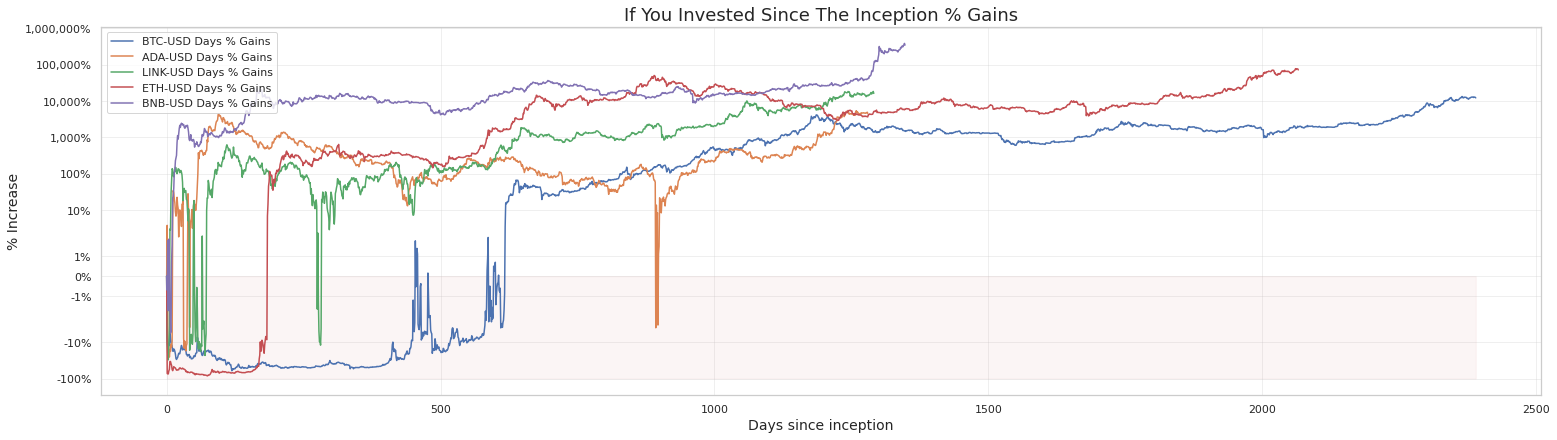

In [5]:
#@title Inception Gain
import matplotlib as mpl
df = pd.DataFrame()


ticks = ['BTC-USD',
        'ADA-USD', 
         'LINK-USD',
         'ETH-USD',
         'BNB-USD']
    

for tickax in ticks:
  # data = pdr.get_data_yahoo(tickax, interval = '1d', period = "9y")
  # data = data.reset_index()
  # data = data.dropna()
  data = getdata(tickax,9)
  df[f'{tickax}%_day_Gain'] = 100*(data.Close - data.Close[0])/ data.Close[0]
df

sns.set_style("whitegrid")

fig = plt.figure()
fig.set_size_inches((20, 16))
ax1 = fig.add_axes((0, 0.72, 1, 0.32))

# Format x-axis ticks as dates
# ax1.xaxis_date()
n = 3
mpl.rcParams['axes.prop_cycle'] = plt.cycler("color", sns.color_palette("Set2"))


# Plot candlestick chart
for tickax in ticks:
  ax1.plot(df.index, df[f'{tickax}%_day_Gain'], label=f"{tickax} Days % Gains", alpha = 1)
ax1.fill_between(df.index, [0]*len(df.index), [-100]*len(df.index), color= '#bc4749', alpha = 0.05)  



# Set Y axis format 
ax1.set_title(f'If You Invested Since The Inception % Gains', size=18)
ax1.set_ylabel(f'% Increase', size=14)
ax1.set_xlabel('Days since inception', size=14)
ax1.set_yscale('symlog')
ax1.get_yaxis().set_major_formatter(
  ticker.FuncFormatter(lambda x, p: format(int(x), ',') + '%'))
plt.grid(True, which="both", ls="-", alpha = 0.3)
plt.legend(loc = 'upper left')
plt.show()


[*********************100%***********************]  1 of 1 completed


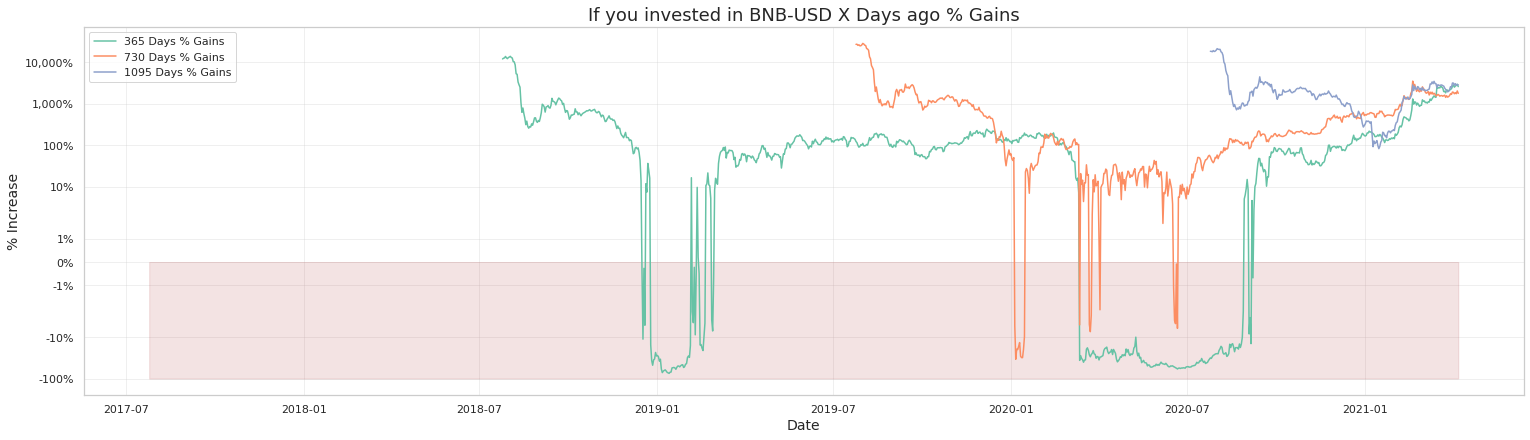

[*********************100%***********************]  1 of 1 completed


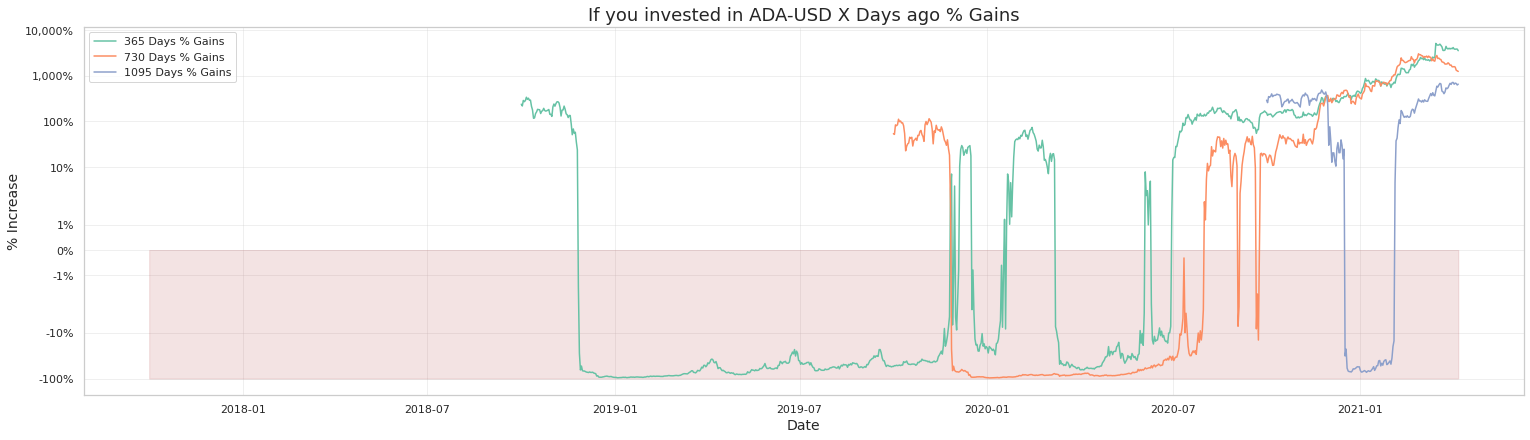

[*********************100%***********************]  1 of 1 completed


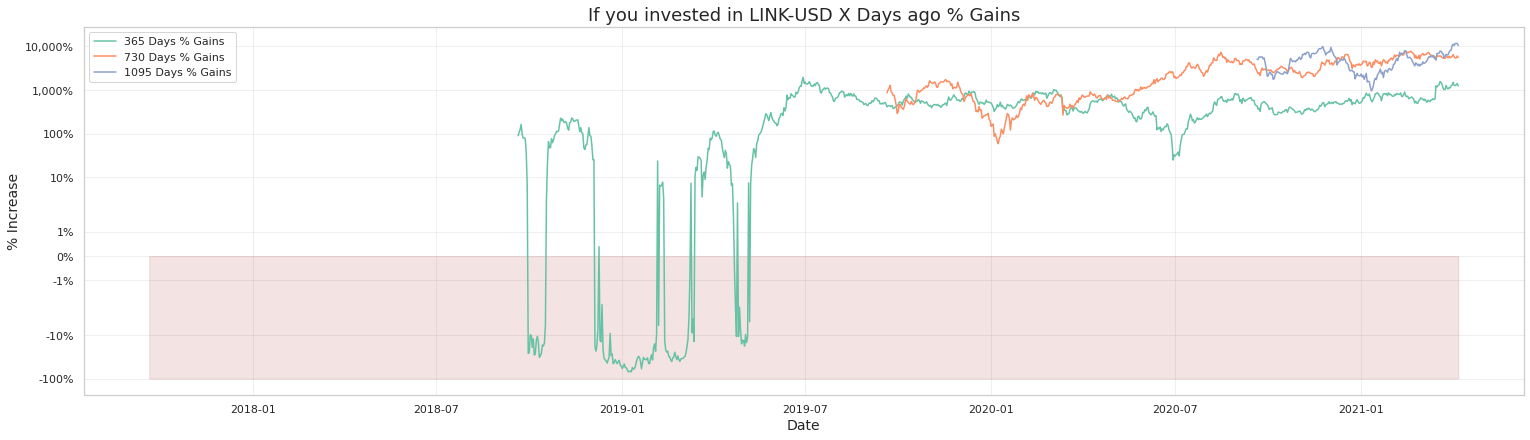

[*********************100%***********************]  1 of 1 completed


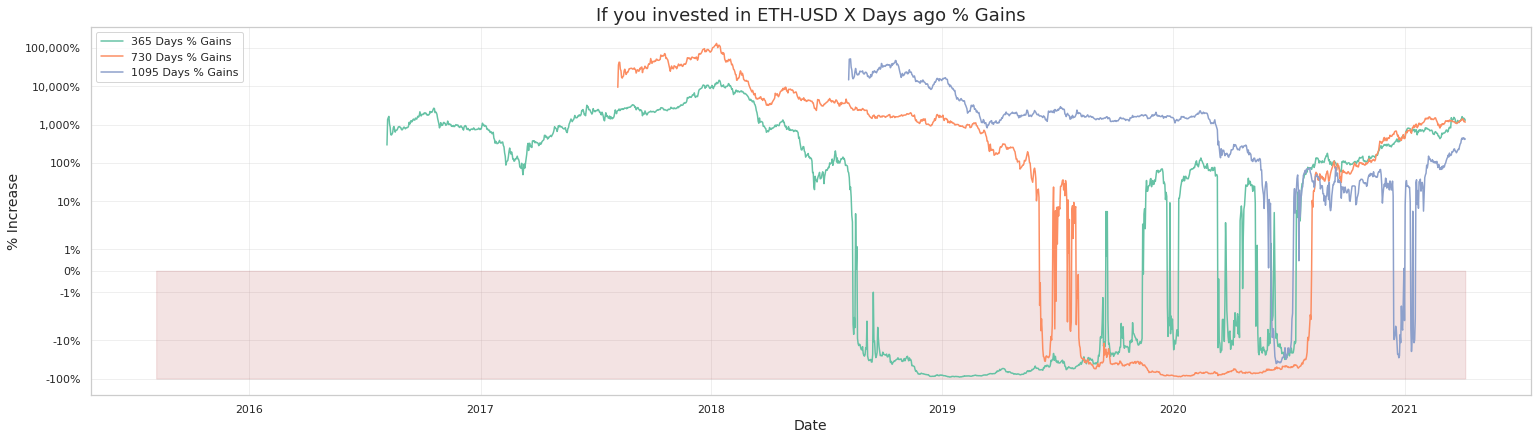

[*********************100%***********************]  1 of 1 completed


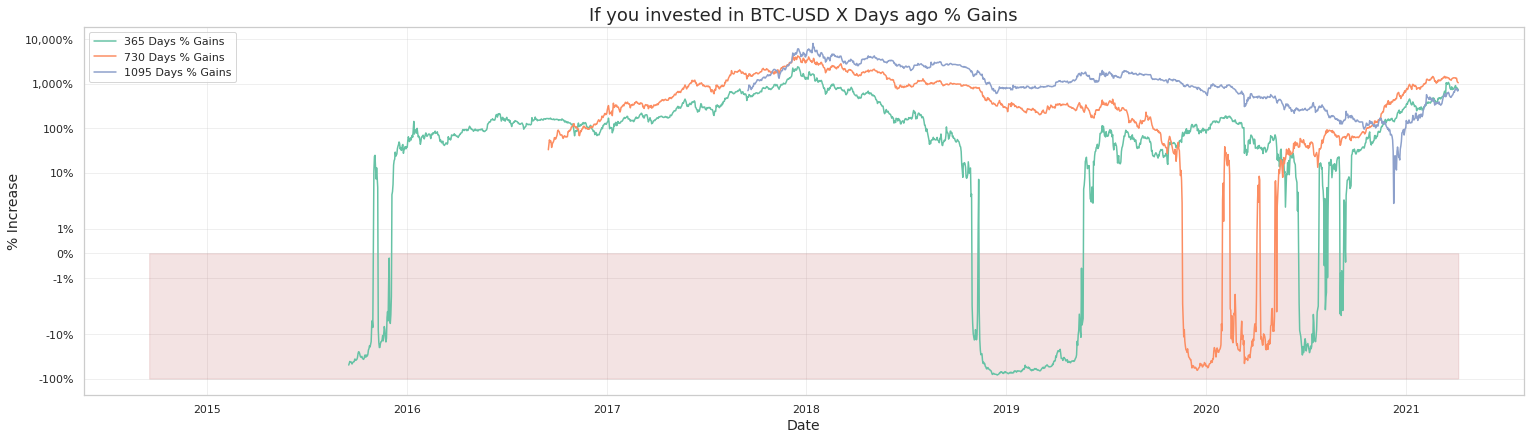

In [6]:
#@title X Days %Gain
# import matplotlib as mpl

df = pd.DataFrame()


ticks = ['BNB-USD',
          'ADA-USD', 
         'LINK-USD',
         'ETH-USD',
         'BTC-USD']

# for time in [30,60,90,180,365,365*3]:       

for tickax in ticks:
  # data = pdr.get_data_yahoo(tickax, interval = '1d', period = "9y")
  # data = data.reset_index()
  # # data['Close_s'] = data.Close.shift(time)
  # data = data.dropna()
  data = getdata(tickax,9)
  # df[f'{tickax}%_{time}day_Gain'] = 100*(data.Close - data.Close_s)/ data.Close_s
  # df[f'{tickax}%_{time}day_Gain'] = (data.Close_s - data.Close[0])/ data.Close[0]

# Style and size

  # df[df == 0] = None
  # df[df == 'NaN'] = None
  sns.set_style("whitegrid")

  fig = plt.figure()
  fig.set_size_inches((20, 16))
  ax1 = fig.add_axes((0, 0.72, 1, 0.32))

  # Format x-axis ticks as dates
  # ax1.xaxis_date()
  n = 3
  mpl.rcParams['axes.prop_cycle'] = plt.cycler("color", sns.color_palette("Set2"))


  # Plot candlestick chart
  for time in [365,365*2,365*3]:  
    data['Close_s'] = data.Close.shift(time) 
    data[f'{tickax}%_{time}day_Gain'] = 100*(data.Close - data.Close_s)/ data.Close_s
    ax1.plot(data.Date, data[f'{tickax}%_{time}day_Gain'], label=f"{time} Days % Gains", alpha = 1)
    ax1.fill_between(data.Date, [0]*len(data.Date), [-100]*len(data.Date), color= '#bc4749', alpha = 0.05)  



  # Set Y axis format 
  ax1.set_title(f'If you invested in {tickax} X Days ago % Gains', size=18)
  ax1.set_ylabel(f'% Increase', size=14)
  ax1.set_xlabel('Date', size=14)
  ax1.set_yscale('symlog')
  ax1.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda x, p: format(int(x), ',') + '%'))
  plt.grid(True, which="both", ls="-", alpha = 0.3)
  plt.legend(loc = 'upper left')
  plt.show()


[*********************100%***********************]  1 of 1 completed


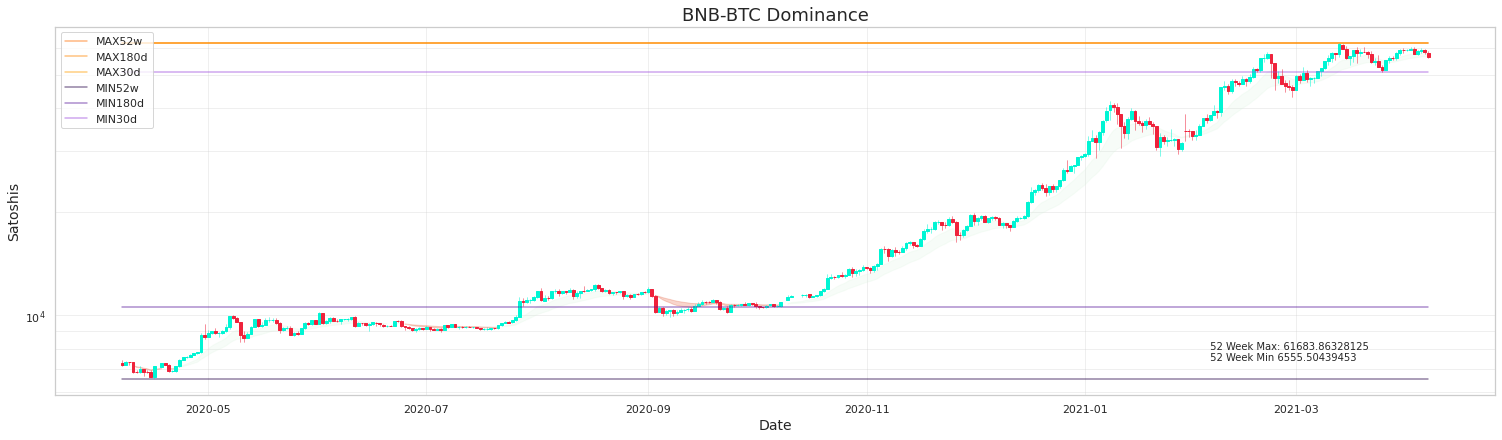

[*********************100%***********************]  1 of 1 completed


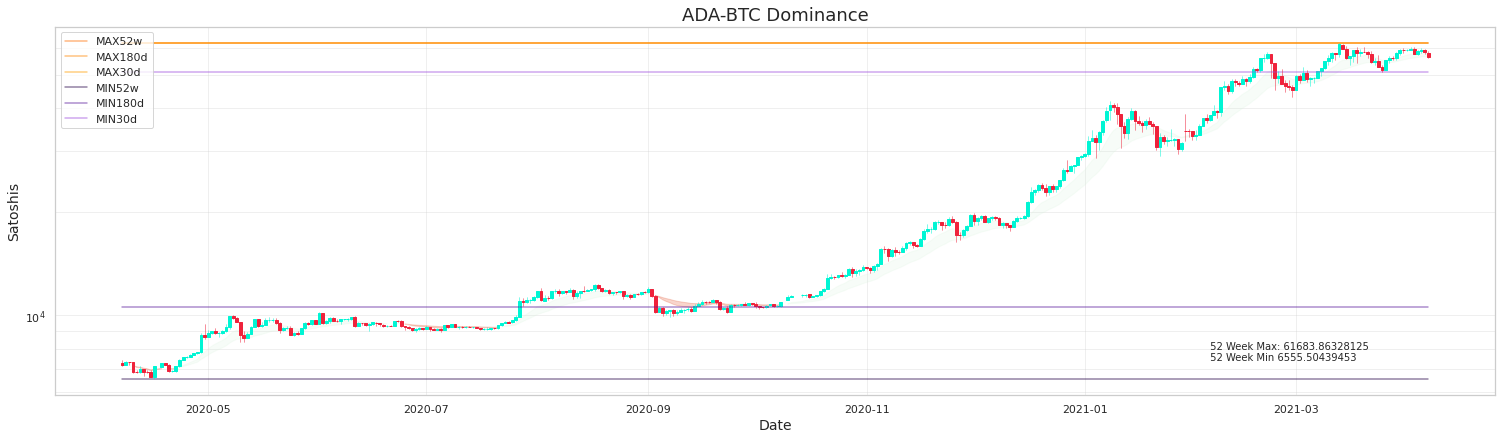

[*********************100%***********************]  1 of 1 completed


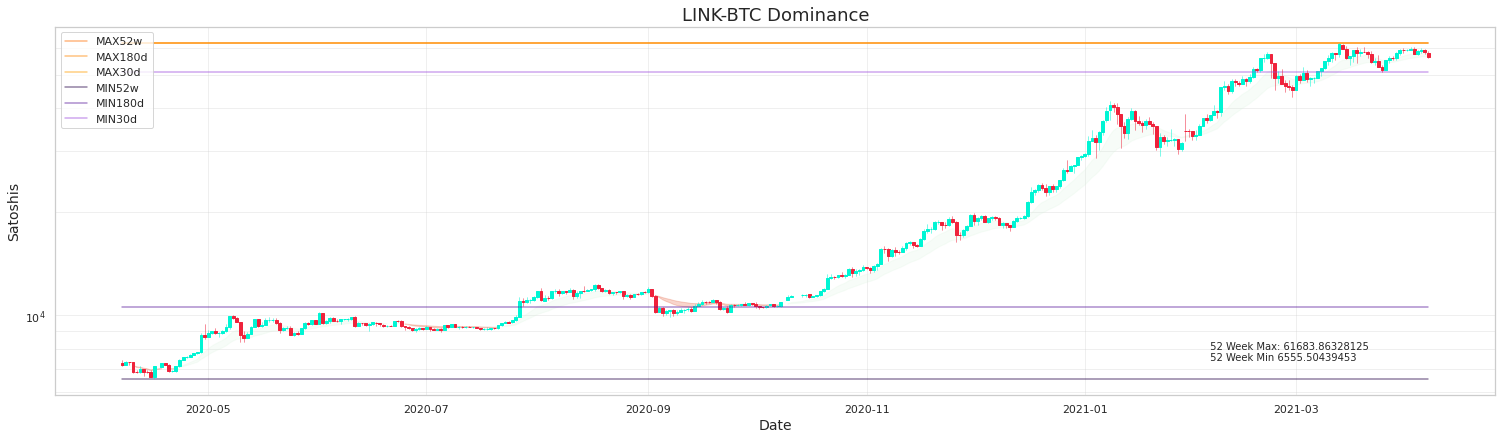

[*********************100%***********************]  1 of 1 completed


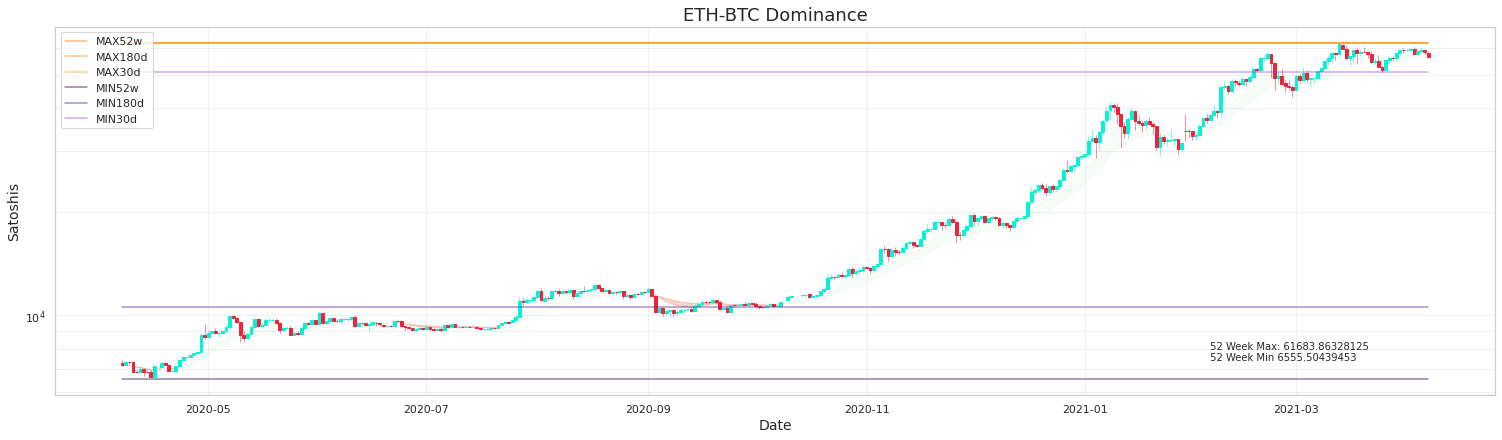

In [9]:
#@title X Days %Gain
import matplotlib as mpl
df = pd.DataFrame()


ticks = ['BNB-BTC',
          'ADA-BTC', 
         'LINK-BTC',
         'ETH-BTC']

# for time in [30,60,90,180,365,365*3]:       


for tickax in ticks:
  yf.pdr_override() 
  data =  pdr.get_data_yahoo('BTC-USD', interval = '1d', period = "1y")
  max52 = max(data.High)
  min52 = min(data.Low)
  df = data.reset_index()
  max30 = max(df.tail(30)['High'])
  min30 = min(df.tail(30)['Low'])
  max180 = max(df.tail(180)['High'])
  min180 = min(df.tail(180)['Low'])


  data = data.dropna()

  sns.set_style("whitegrid")

  fig = plt.figure()
  fig.set_size_inches((20, 16))
  ax1 = fig.add_axes((0, 0.72, 1, 0.32))

  n = 3
  mpl.rcParams['axes.prop_cycle'] = plt.cycler("color", sns.color_palette("Set2"))

  ohlc = []
  for date, row in data.iterrows():
    openp, highp, lowp, closep = row[:4]
    ohlc.append([date2num(date), openp, highp, lowp, closep])

  data["EMA12"] = data['Close'].ewm(span=12).mean()
  data["EMA26"] = data['Close'].ewm(span=26).mean()
  ax1.fill_between(data.index, data["EMA12"], data["EMA26"], where=(data["EMA12"]>data["EMA26"]), color= '#d8f3dc', alpha = 0.2)
  ax1.fill_between(data.index, data["EMA12"], data["EMA26"], where=(data["EMA12"]<data["EMA26"]), color= '#dc2f02', alpha = 0.2)
  ax1.plot(data.index,[max52]*len(data.index) , color= '#ff6d00', label=f"MAX52w", alpha = 0.5)
  ax1.plot(data.index,[max180]*len(data.index) , color= '#ff8500', label=f"MAX180d", alpha = 0.5)
  ax1.plot(data.index,[max30]*len(data.index) , color= '#ff9e00', label=f"MAX30d", alpha = 0.5)
  ax1.plot(data.index,[min52]*len(data.index) , color= '#240046', label=f"MIN52w", alpha = 0.5)
  ax1.plot(data.index,[min180]*len(data.index) , color= '#5a189a', label=f"MIN180d", alpha = 0.5)
  ax1.plot(data.index,[min30]*len(data.index) , color= '#9d4edd', label=f"MIN30d", alpha = 0.5)



  candlestick_ohlc(ax1, ohlc, colorup="#00f5d4", colordown="#ef233c", width=0.8)

  fig.text(0.8, 0.75, f'\n 52 Week Max: {max52:.8f} \n 52 Week Min {min52:.8f}')


  # Set Y axis format 
  ax1.set_title(f'{tickax} Dominance', size=18)
  ax1.set_ylabel(f'Satoshis', size=14)
  ax1.set_xlabel('Date', size=14)
  ax1.set_yscale('log')
  plt.grid(True, which="both", ls="-", alpha = 0.3)
  plt.legend(loc = 'upper left')
  plt.show()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


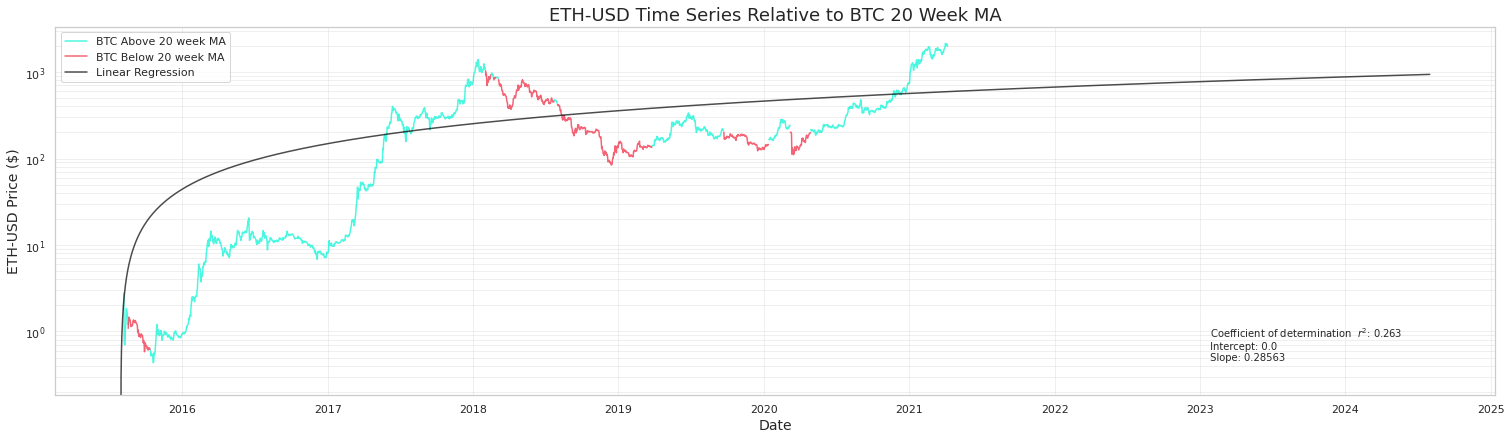

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


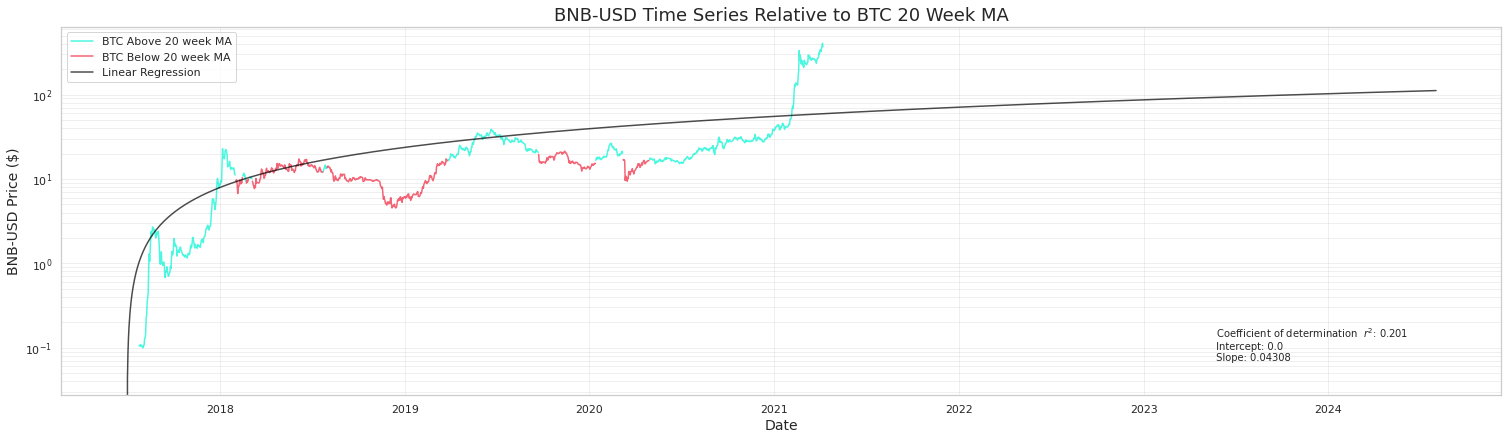

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


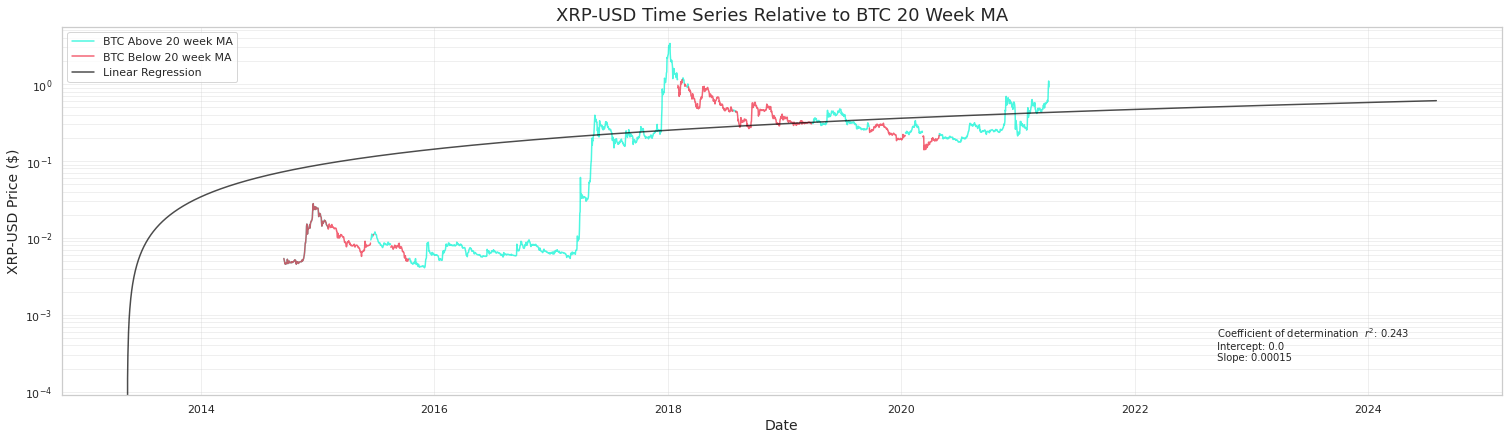

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


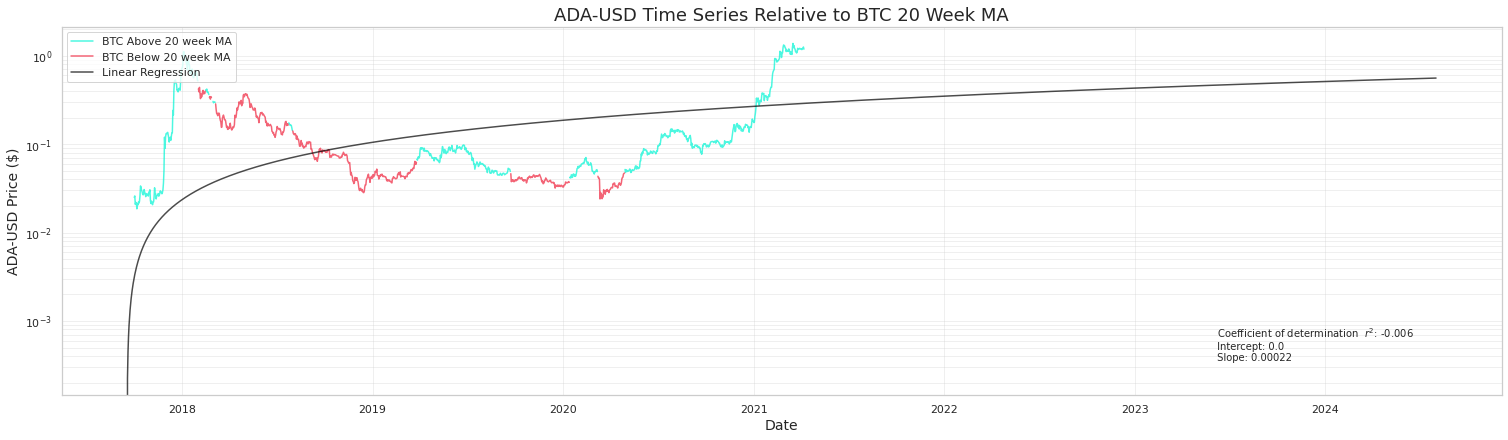

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


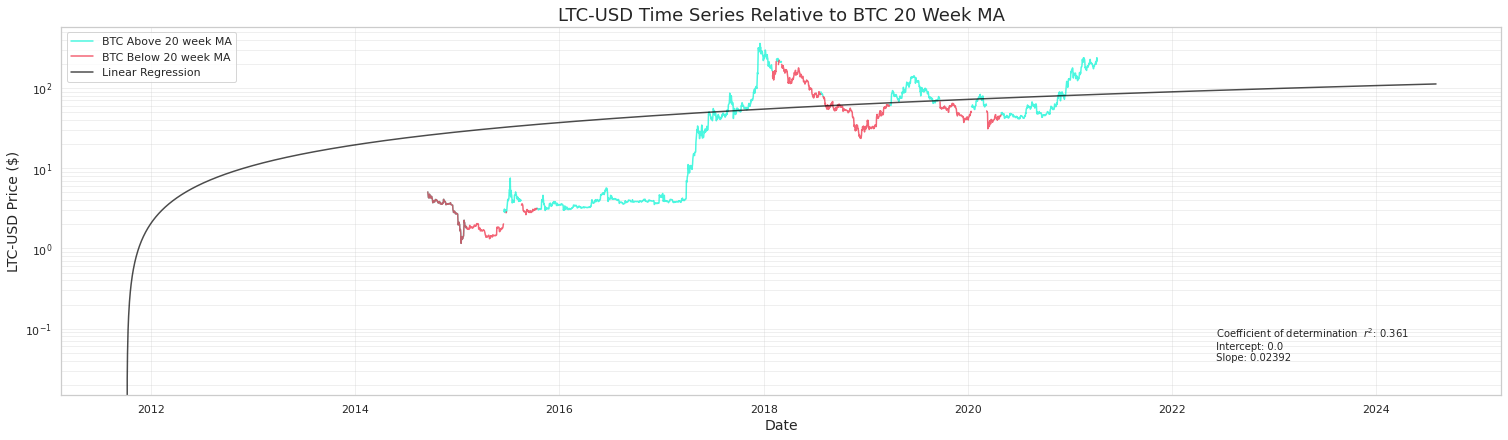

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


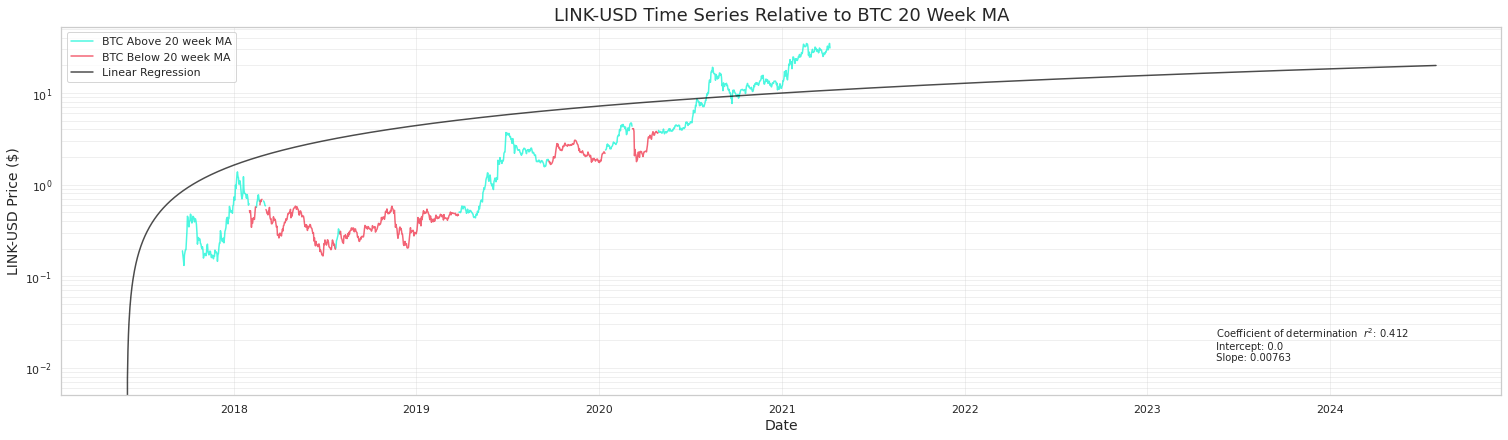

In [10]:
#@title LOG FIT Estimate



ticks = ['ETH-USD','BNB-USD',
         'XRP-USD', 'ADA-USD', 
         'LTC-USD','LINK-USD']

inception = ["2015-07-30", "2017-07-01", 
             "2013-05-15", "2017-09-17",
             "2011-10-07", "2017-06-01"]


yf.pdr_override() 
for tickax,incept in zip(ticks,inception): 

  # BTC = pdr.get_data_yahoo('BTC-USD', interval = '1d', period = "9y")
  # BTC['MA20'] = BTC['Close'].rolling(window=140).mean()
  # BTC
  # data = pdr.get_data_yahoo(tickax, interval = '1d', period = "9y")

  # BTC['GMA20'] = data['Adj Close']
  # BTC['LMA20'] = data['Adj Close']
  # BTC.loc[BTC['Adj Close'] > BTC['MA20'],'LMA20'] = None
  # BTC.loc[BTC['Adj Close'] < BTC['MA20'],'GMA20'] = None

  # y =  np.array(data['Adj Close'])
  # x = mdates.date2num(data.index)
  # p4 = np.poly1d(np.polyfit(x, np.log(y), 1))
  # xx = np.linspace(x.min(), x.max(), 100)
  # dd = mdates.num2date(xx)
  # data = BTC.copy()
  data = BTC20weekma(tickax)
  X, y, temp, pred, lg = logfit(tickax,incept)
  r_sq = lg.score(X, y)
  y[y == 0] = None

  


  # Style and size
  sns.set_style("whitegrid")
  
  fig = plt.figure()
  fig.set_size_inches((20, 16))
  ax1 = fig.add_axes((0, 0.72, 1, 0.32))

  # Format x-axis ticks as dates
  ax1.xaxis_date()


  # Plot candlestick chart
  ax1.plot(data.index, data['GMA20'], label=f"BTC Above 20 week MA",c = '#00f5d4', alpha = 0.7)
  ax1.plot(data.index, data['LMA20'], label=f"BTC Below 20 week MA",c = '#ef233c', alpha = 0.7)
  ax1.plot(temp.index, pred, c = '#000000', label='Linear Regression', alpha = 0.7)


  # Set Y axis format 
  ax1.set_title(f'{tickax} Time Series Relative to BTC 20 Week MA', size=18)
  ax1.set_ylabel(f'{tickax} Price ($)', size=14)
  ax1.set_xlabel('Date', size=14)
  ax1.set_yscale('log')
  fig.text(0.8, 0.75, f'\n Coefficient of determination $\ r^2 $: {round(r_sq,3)} \n Intercept: {lg.intercept_} \n Slope: {round(lg.coef_[0],5)}')
  plt.grid(True, which="both", ls="-", alpha = 0.3)
  plt.legend(loc = 'upper left')
  plt.show()